<a href="https://colab.research.google.com/github/Dharshini13002/Machine-learning-codes/blob/main/CA1Examquescodeonlinearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UPLOADING THE IMAGE FILE

In [ ]:
from google.colab import files
uploaded=files.upload()
for filename in uploaded.keys():
  print(uploaded[filename])

Saving download.jpg to download (1).jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x12\x12\x12\x12\x15\x15\x15\x15\x15\x15\x10\x15\x10\x15\x15\x10\x15\x15\x15\x15\x15\x15\x16\x16\x15\x15\x15\x16\x18\x1d( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-%\x1d\x1f---------------------------/----------------------\xff\xc0\x00\x11\x08\x01\x13\x00\xb7\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x06\x00\x07\xff\xc4\x00?\x10\x00\x02\x01\x02\x04\x03\x05\x05\x06\x05\x02\x06\x03\x00\x00\x00\x01\x02\x03\x00\x11\x04\x12!1\x05AQ\x13"aq\x81\x062B\x91\xa1\x14#R\xb1\xc1\xd1\x07br\x82\xb2\xa2\xf03C\x92\xa3\xc2\xe1\x16cs\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x06\xff\xc4\x003\x11\x00\x02\x02\x01\x03\x02\x03\x06\x05\x04\x03\x01\x00\x00

LOADING THE IMAGE FILE

In [ ]:
import cv2
image=cv2.imread('download.jpg')
if image is None:
  print("failed to load iamge")
else:
  print("image loaded successfully!")

image loaded successfully!


BASIC IMAGE OPREATION

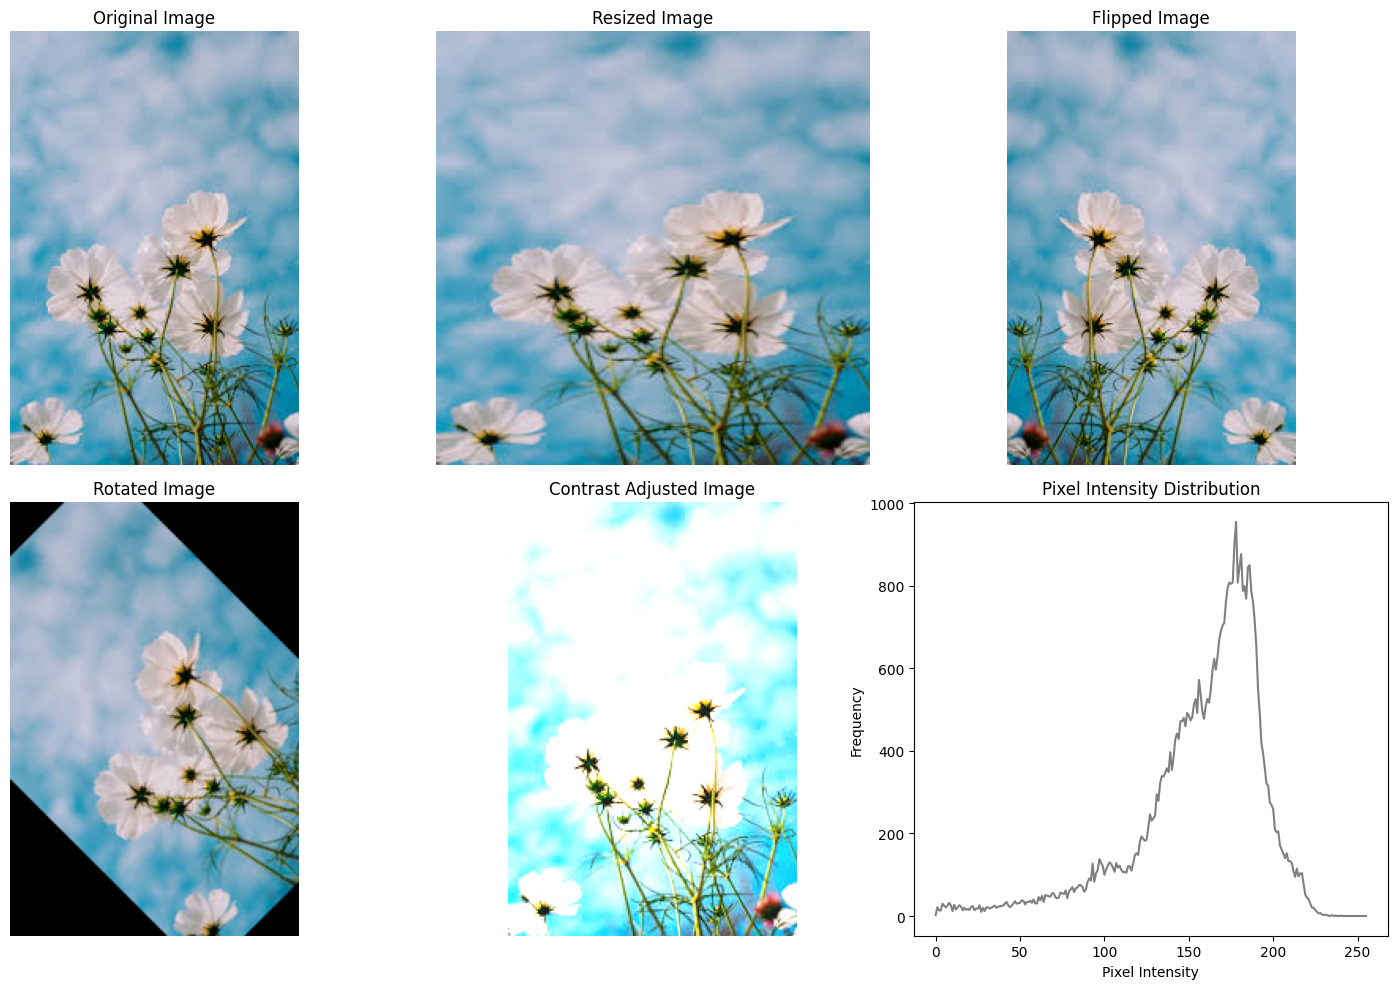

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread('/content/download.jpg')
if image is None:
  print("image not found.please check the file path")
  exit()
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
resized=cv2.resize(image,(300,300))
flipped = cv2.flip(image, 1)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, rotation_matrix, (w, h))

alpha = 1.5
beta = 20
contrast_adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(contrast_adjusted, cv2.COLOR_BGR2RGB))
plt.title('Contrast Adjusted Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.plot(hist, color='gray')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


IMAGE WITH PIXEL RELATIONSHIP

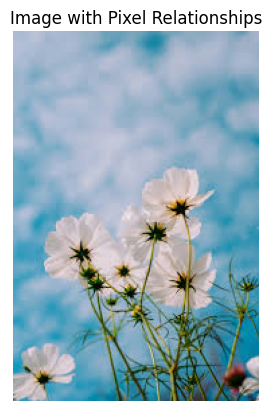

Some pixel relationships:
((0, 0), (1, 0))
((0, 0), (0, 1))
((0, 1), (1, 1))
((0, 1), (0, 2))
((0, 2), (1, 2))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
# Load the image
image = imread('download.jpg')
# Define the pixel relationships (e.g., neighboring pixels)
height, width = image.shape[:2]
neighbors = []
for i in range(height):
  for j in range(width):
    if i < height - 1:
               neighbors.append(((i, j), (i + 1, j)))
    if j < width - 1:
               neighbors.append(((i, j), (i, j + 1)))
# Display the image
plt.imshow(image)
plt.title("Image with Pixel Relationships")
plt.axis("off")
plt.show()
# Print some pixel relationships
print("Some pixel relationships:")
for pair in neighbors[:5]:
  print(pair)

SAMPLING IMAGE

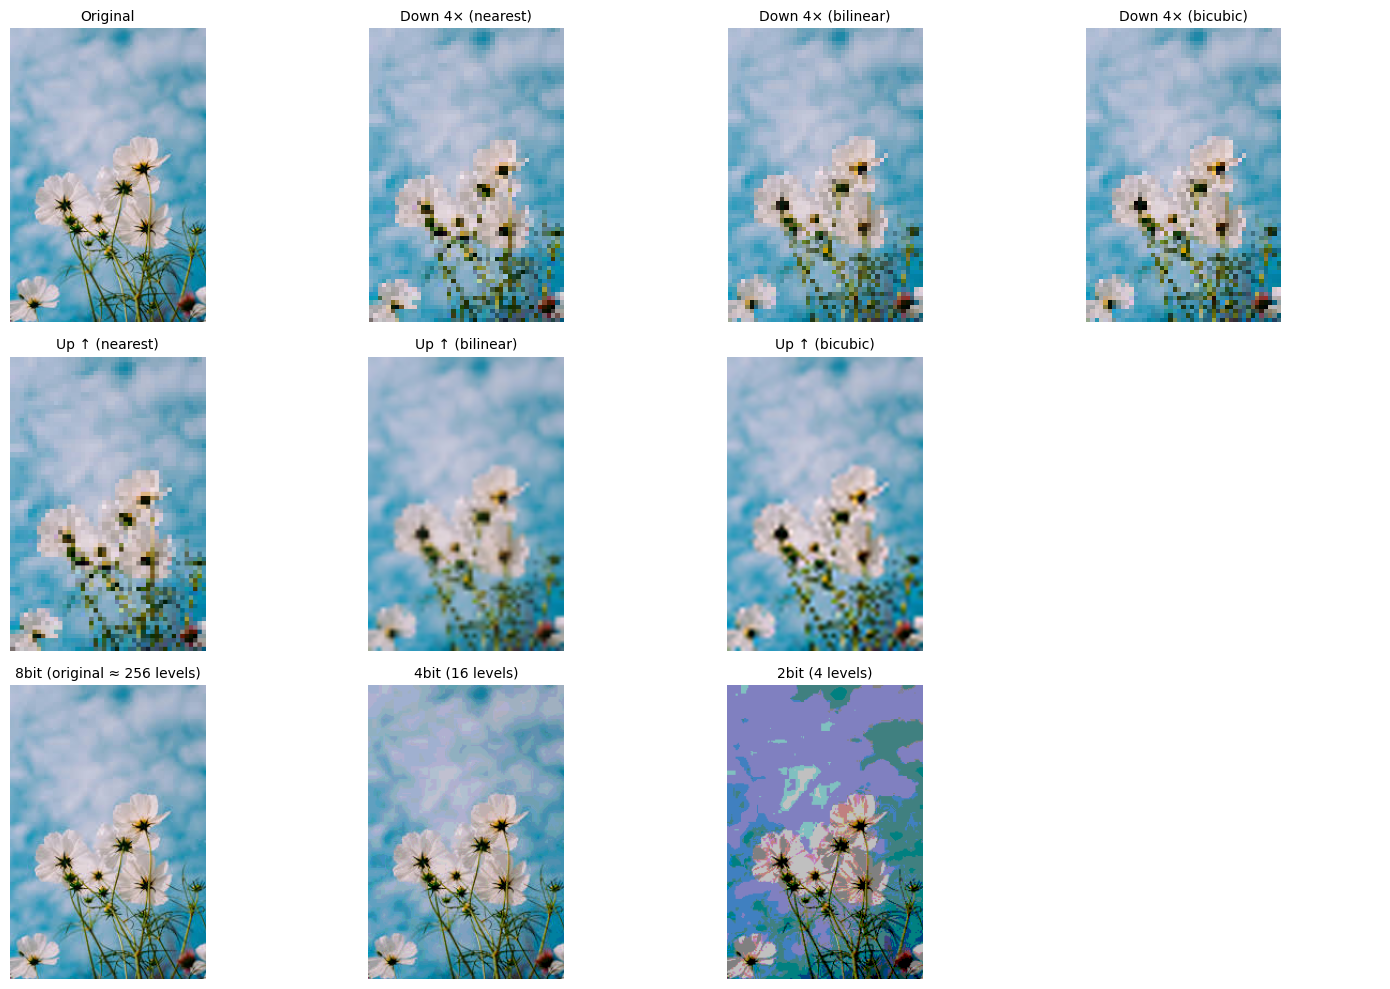

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
img_bgr = cv2.imread('download.jpg')
assert img_bgr is not None, "Image not found! Upload 'sample1.jpg'."
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
H, W = img.shape[:2]

# Downsampling
factor = 4
down_nn = cv2.resize(img, (W//factor, H//factor), interpolation=cv2.INTER_NEAREST)
down_bl = cv2.resize(img, (W//factor, H//factor), interpolation=cv2.INTER_LINEAR)
down_bc = cv2.resize(img, (W//factor, H//factor), interpolation=cv2.INTER_CUBIC)

# Upsampling
up_nn = cv2.resize(down_nn, (W, H), interpolation=cv2.INTER_NEAREST)
up_bl = cv2.resize(down_bl, (W, H), interpolation=cv2.INTER_LINEAR)
up_bc = cv2.resize(down_bc, (W, H), interpolation=cv2.INTER_CUBIC)

# Quantization
def quantize(img_rgb, bits=8):
    """Reduce per-channel bits (1–8)."""
    levels = 2**bits
    step = 256 // levels
    return ((img_rgb // step) * step).astype(np.uint8)

img_8bit = img.copy()
img_4bit = quantize(img, 4)
img_2bit = quantize(img, 2)

# Plotting
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

titles = [
    "Original",
    f"Down {factor}× (nearest)", f"Down {factor}× (bilinear)", f"Down {factor}× (bicubic)",
    "Up ↑ (nearest)", "Up ↑ (bilinear)", "Up ↑ (bicubic)", "",
    "8bit (original ≈ 256 levels)", "4bit (16 levels)", "2bit (4 levels)", ""
]

images = [
    img, down_nn, down_bl, down_bc,
    up_nn, up_bl, up_bc, None,
    img_8bit, img_4bit, img_2bit, None
]

for ax, im, title in zip(axes, images, titles):
    ax.axis("off")
    ax.set_title(title, fontsize=10)
    if im is not None:
        ax.imshow(im)

plt.tight_layout()
plt.show()

4-8-ADJACENCY

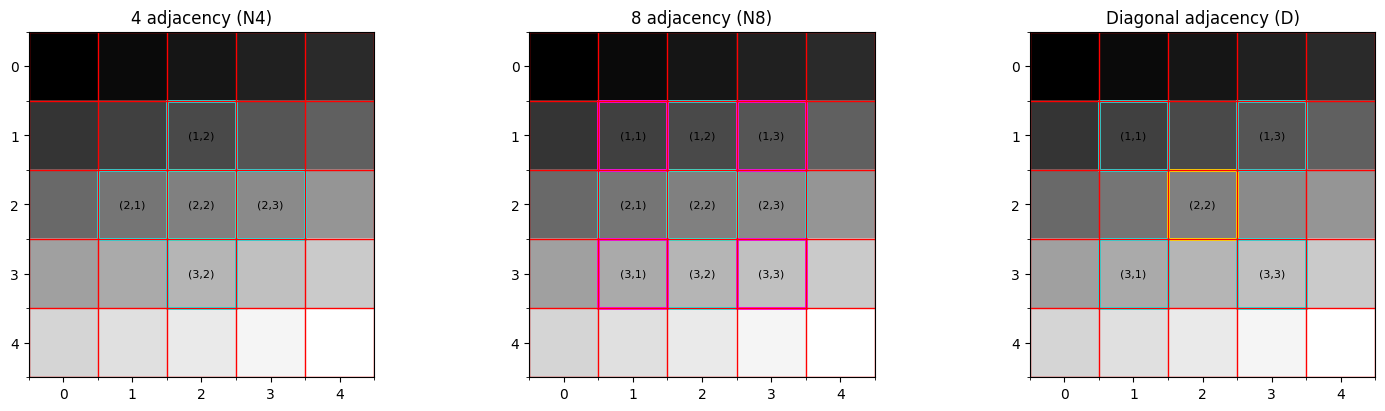

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 5×5 toy image (0 to 24)
img = np.arange(25).reshape(5, 5)

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

def setup_axis(ax, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_xticks(np.arange(-.5, 5.5, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 5.5, 1), minor=True)
    ax.grid(which='minor', linestyle='-', linewidth=1, color='red')
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(5))
    ax.set_xticklabels(np.arange(5))
    ax.set_yticklabels(np.arange(5))

def highlight(ax, pixels, center=(2,2), diag_color=None):
    for r, c in pixels:
        if (r, c) == center:
            color = "yellow"
        elif diag_color and (r, c) not in [
            (center[0]-1, center[1]), (center[0]+1, center[1]),
            (center[0], center[1]-1), (center[0], center[1]+1)
        ]:
            color = diag_color
        else:
            color = "cyan"
        ax.add_patch(plt.Rectangle((c - 0.5, r - 0.5), 1, 1,
                                   edgecolor=color, facecolor='none', linewidth=2))
        ax.text(c, r, f"({r},{c})", ha='center', va='center', fontsize=8, color='black')

center = (2, 2)

# 4 adjacency
setup_axis(axes[0], "4 adjacency (N4)")
n4 = [center, (1,2), (3,2), (2,1), (2,3)]
highlight(axes[0], n4, center)

# 8 adjacency
setup_axis(axes[1], "8 adjacency (N8)")
n8 = n4 + [(1,1), (1,3), (3,1), (3,3)]
highlight(axes[1], n8, center, diag_color="magenta")

# Diagonal adjacency
setup_axis(axes[2], "Diagonal adjacency (D)")
d = [center, (1,1), (1,3), (3,1), (3,3)]
highlight(axes[2], d, center)

plt.show()


2D FOURIER TRANSFORM

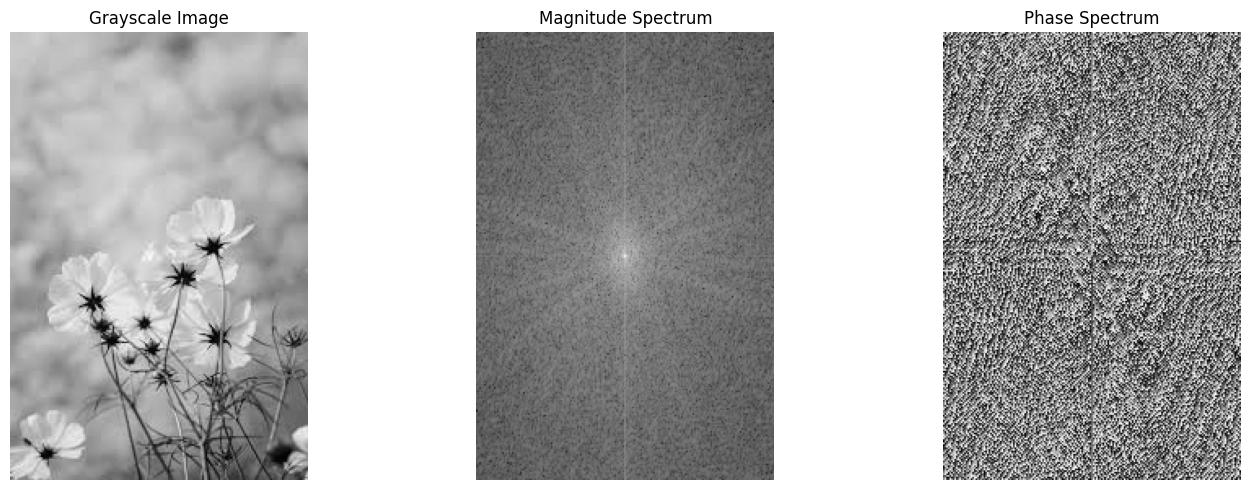

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load image and convert to grayscale ---
img_bgr = cv2.imread('download.jpg')  # ← Replace with your image file
assert img_bgr is not None, "Image not found! Please upload 'sample1.jpg'"
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# --- 2. Compute 2D FFT ---
f = np.fft.fft2(gray)         # 2D Fourier Transform
fshift = np.fft.fftshift(f)  # Shift zero frequency to center

# --- 3. Compute magnitude and phase spectra ---
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # log for visibility; +1 to avoid log(0)
phase_spectrum = np.angle(fshift)                     # phase in radians

# --- 4. Plot results ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()


DIFFERENT IMAGE TRANSFORMATION

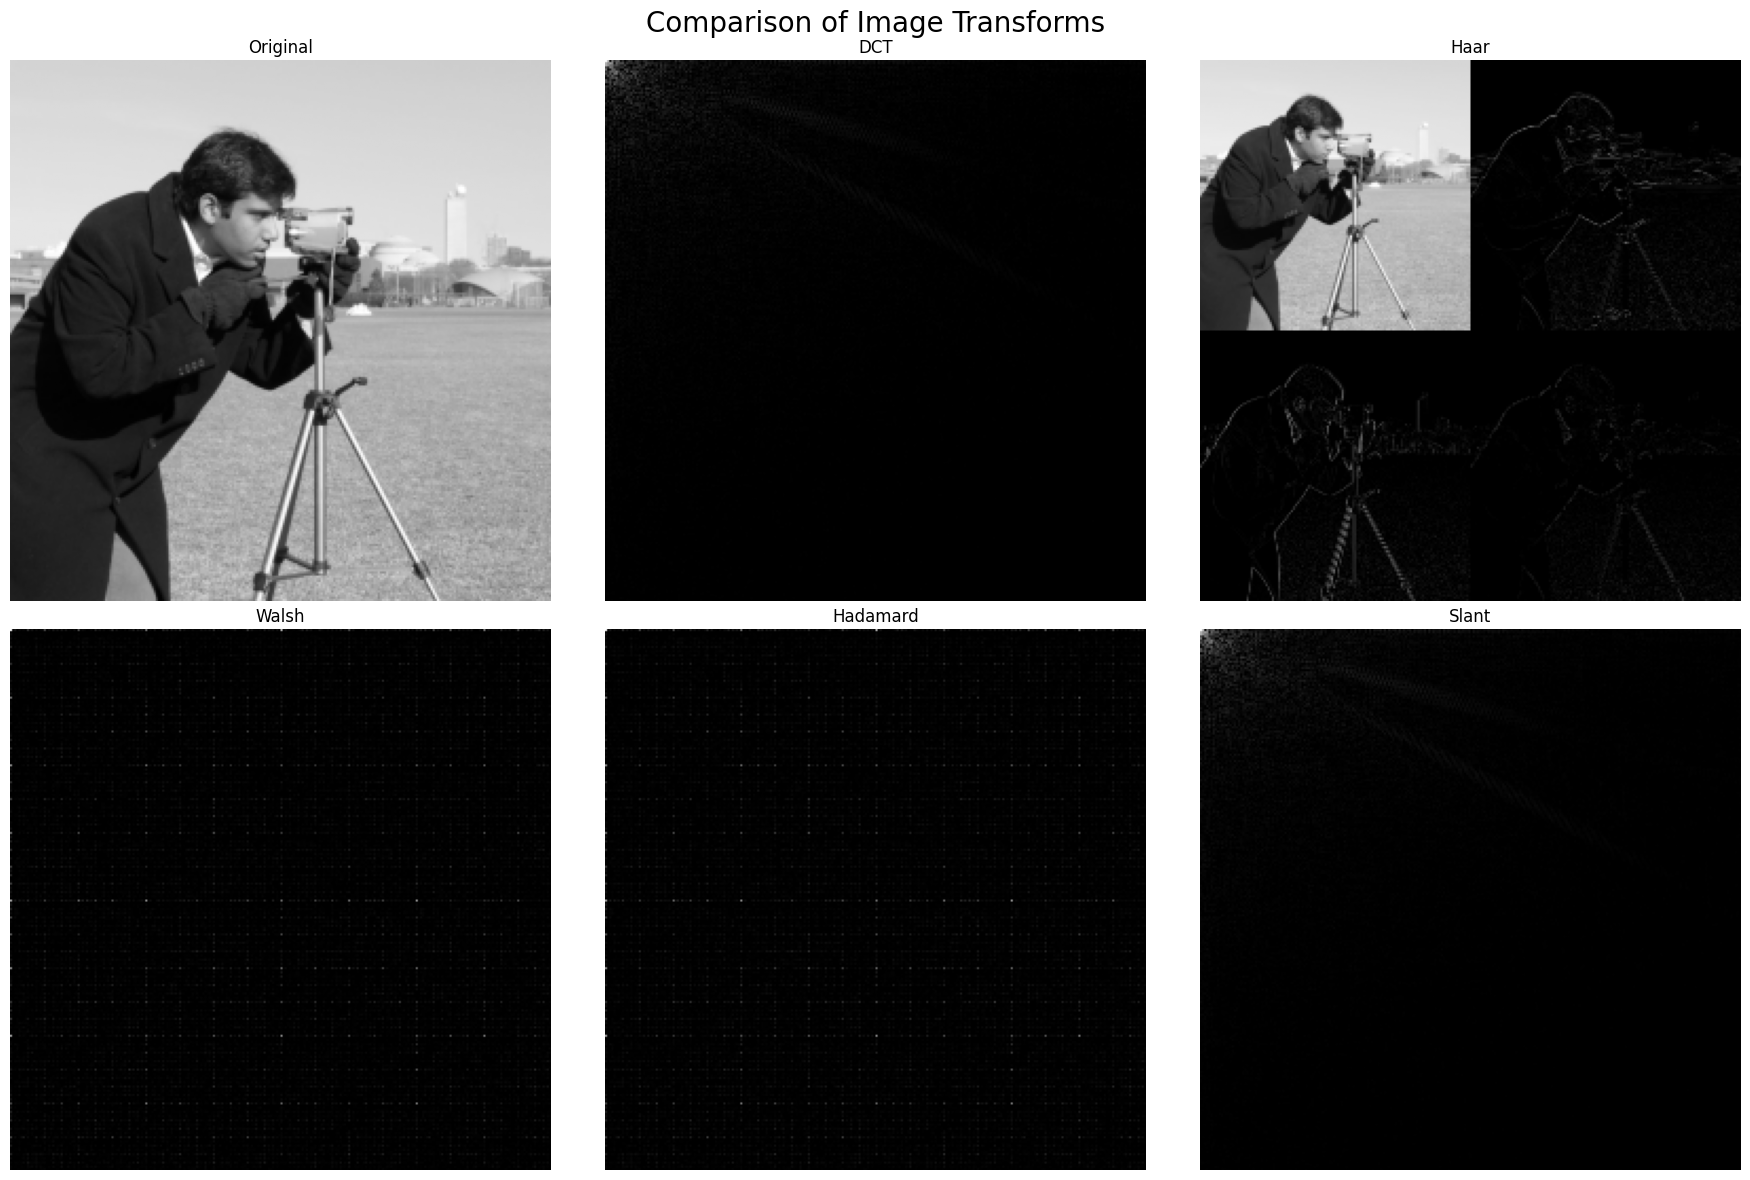

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import dct
from skimage import data
from skimage.transform import resize
from scipy.linalg import hadamard
from google.colab import files

# --- Load and Preprocess Image ---
image = data.camera()  # already grayscale
image = resize(image, (256, 256), anti_aliasing=True)
image = image / np.max(image)  # Normalize to [0, 1]

# --- DCT Transform (2D) ---
def dct2(img):
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

# --- Haar Wavelet Transform (1-level) ---
def haar_transform(img):
    coeffs2 = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs2
    top = np.hstack((cA, cH))
    bottom = np.hstack((cV, cD))
    return np.vstack((top, bottom))

# --- Walsh Transform ---
def walsh_transform(img):
    N = img.shape[0]
    def walsh_matrix(n):
        if n == 1:
            return np.array([[1]])
        else:
            Wn_1 = walsh_matrix(n // 2)
            return np.block([
                [Wn_1, Wn_1],
                [Wn_1, -Wn_1]
            ])
    W = walsh_matrix(N) / np.sqrt(N)
    return W @ img @ W.T

# --- Hadamard Transform ---
def hadamard_transform(img):
    N = img.shape[0]
    H = hadamard(N) / np.sqrt(N)
    return H @ img @ H.T

# --- Slant Transform ---
def slant_matrix(N):
    A = np.zeros((N, N))
    alpha = np.sqrt(1.0 / N)
    A[0, :] = alpha
    for k in range(1, N):
        for n in range(N):
            A[k, n] = np.sqrt(2.0 / N) * np.cos(np.pi * k * (2 * n + 1) / (2 * N))
    return A

def slant_transform(img):
    N = img.shape[0]
    S = slant_matrix(N)
    return S @ img @ S.T

# --- Apply All Transforms ---
transforms = {
    'Original': image,
    'DCT': dct2(image),
    'Haar': haar_transform(image),
    'Walsh': walsh_transform(image),
    'Hadamard': hadamard_transform(image),
    'Slant': slant_transform(image)
}

# --- Display Results ---
plt.figure(figsize=(18, 12))
for i, (name, transformed_img) in enumerate(transforms.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(np.log1p(np.abs(transformed_img)), cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.suptitle("Comparison of Image Transforms", fontsize=20)
plt.tight_layout()
plt.savefig("image_transforms_comparison.png", dpi=300)
plt.show()

# --- Download the image (Google Colab specific) ---
files.download("image_transforms_comparison.png")


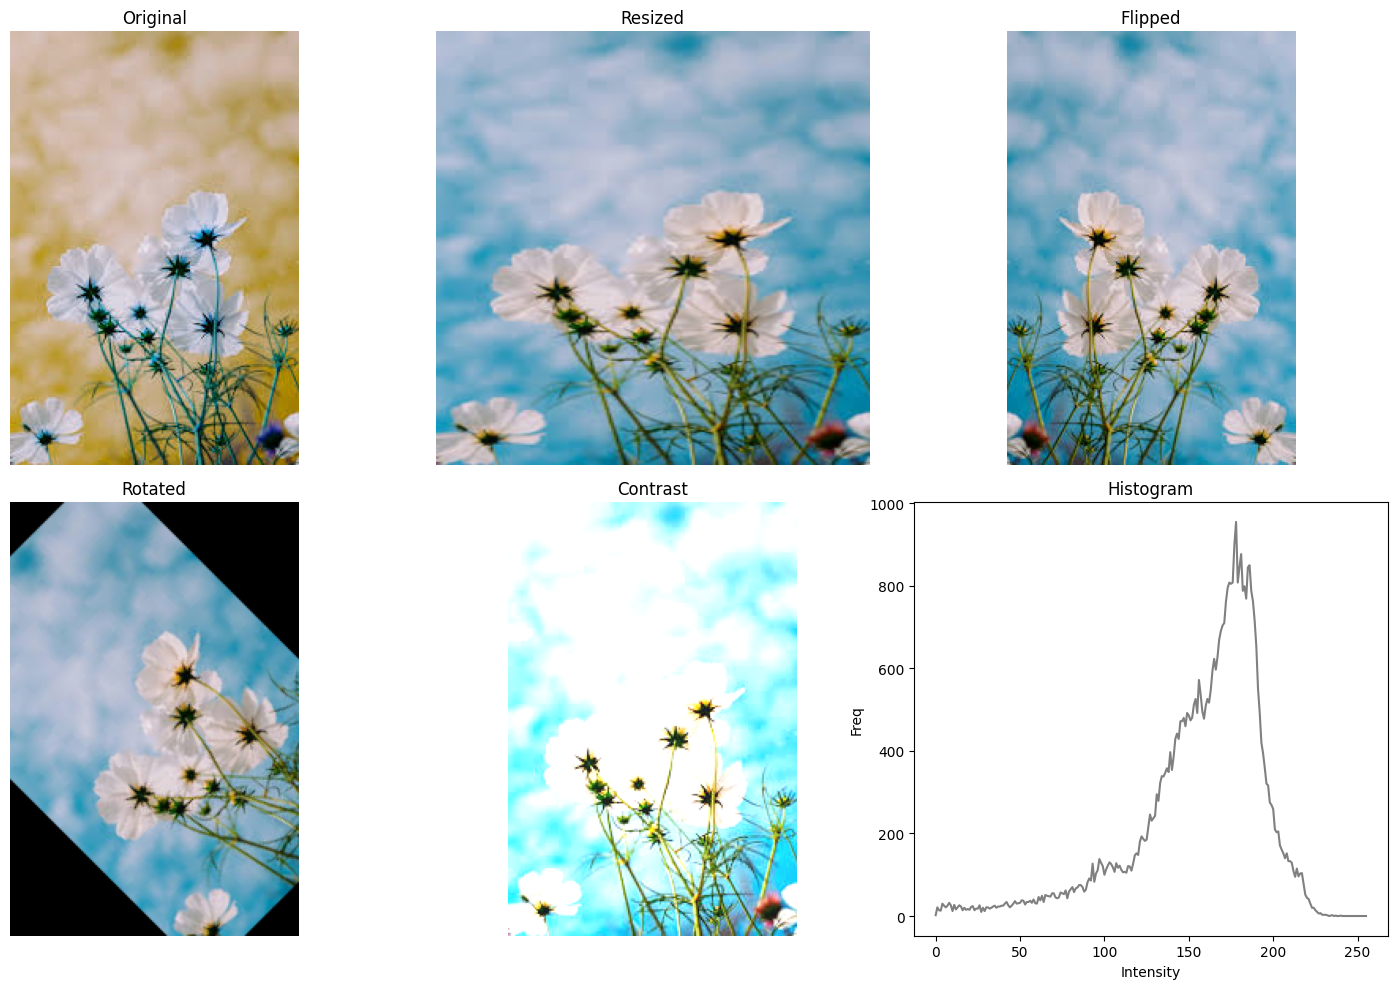

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/DIP/sample1.jpg')
if img is None: print("Image not found"); exit()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img.shape[:2]
mods = [
    ('Original', cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
    ('Resized', cv2.resize(img, (300, 300))),
    ('Flipped', cv2.flip(img, 1)),
    ('Rotated', cv2.warpAffine(img, cv2.getRotationMatrix2D((w//2,h//2), 45, 1.0), (w,h))),
    ('Contrast', cv2.convertScaleAbs(img, alpha=1.5, beta=20)),
    ('Histogram', cv2.calcHist([gray], [0], None, [256], [0,256]))
]

plt.figure(figsize=(15,10))
for i, (title, data) in enumerate(mods):
    plt.subplot(2,3,i+1)
    if title == 'Histogram': plt.plot(data, color='gray'); plt.xlabel('Intensity'); plt.ylabel('Freq')
    else: plt.imshow(cv2.cvtColor(data, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.title(title)
plt.tight_layout(); plt.show()
